<a href="https://colab.research.google.com/github/eerjuano/FundMe-test.js-Correction/blob/main/Bank_Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio de Datos Bancarios**

## **Introducción**

**Campaña de marketing bancario por teléfono**

La muestra de datos que nos ocupa, se trata de una campaña de marketing realizada por un banco portugués. Los datos recopilados por telefono, fueron recopilados con el objetivo de que en un futuro se pueda estudiar que perfil de cliente es más propenso a suscribirse a un plan de depósitos a plazos. Realizaremos un tratamiento de los datos, verificaremos que no hayan datos faltantes, renombraremos las variables, verificaremos los tipos de variables y que no hayan muestras duplicadas. Posteriormente, procederemos a analisar el data frame para intentar conseguir correlaciones entre las distintas variables y que se haya conseguido la venta o no del paquete correspondiente.

**Datos**

Conjunto de datos sobre datos de una campaña de marketing bancaria obtenido de la plataforma Kaggle: [DATOS](https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set). el conjunto de datos contiene más de 4500 filas y más de 15 columnas que contiene las características de los clientes como la cantidad de dinero, profesión, edad, estado civil y más. En este CUADERNO, exploraremos los datos y los prepararemos para el modelado.

**Tipos de variables y observaciones sobre las mismas**

El conjunto de datos contiene 17 variables distintas, cada una de ellas puede ser importante y clave para el análisis de los datos y de la decisión final del cliente. En breves, expondremos todas las variables y observaciones sobre las mismas:

1- age: Esta vairable es numérica y muestra la edad del titular de la cuenta.

2- job: Esta variable es de tipo texto y muestra el tipo de trabajo del titular de la cuetna o si no trabaja. Valores posibles: (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3- marital: Esta variable muestra el estado civil del titular y puede adoptar los siguientes valores; (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4- education: El tipo de educación que tiene el titular de la cuenta, sus valores posbiles:  (categorical: "unknown","secondary","primary","tertiary")

5- default: Esta categoría muestra si tiene un credito contratado y el tipo de variable es binaria, valores posibles:  (binary: "yes","no")
  
6- balance: Esta variable muestra el balance medio anual de cada cuenta, es de tipo numérica.

7- housing: Este apartado muestra si tiene un prestamo bancario contratado para una casa o propiedad de primerea vivienda, es de tipo binario: (binary: "yes","no")

8- loan: Esta categoría muestra si tiene un prestamo personal contratado y es de tipo binario: (binary: "yes","no")

9- contact: Muestra el tipo de contacto realizado con el cliente, es importante para saber que tipo de contacto tiene más éxito a la hora de las propagandas, valores posibles: (categorical: "unknown","telephone","cellular")

10- day: Último día del mes en el que fue el último contacto con el cliente.

11- month: Mes último con el que se tuvo contacto con el cliente para la propaganda, es de tipo texto y sus posibles valroes son: (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12- duration: Esta variable es numérica y muestra la duración de la llamada o último contacto realizado en segundos.

13- campaign: Esta categoría muestra el número de contactos realizados con el cliente durante la campaña.

14- pdays: Esta variable guarda la cantidad de días que han pasado después de la campaña anterior a la que realizaron, si el cliente no ha sido contactado previamente, guardará un valor numérico de -1.

15- previous: Esta variable es numérica y muestra el número de veces que fue contactado el cliente anteriormente a la campaña que se realizó.
  
16- poutcome: Esta categoría muestra el resultado de las campañas anteriores en este cliente, puede adoptar los siguientes valores: (categorical: "unknown","other","failure","success")

17-y - Esta variable es la que describe si el cliente finalmente contrató el plan que se vendió en la campaña publicitaria.





---



## **Importamos las librerías necesarias para EDA**

A continuación se muestran las librerías que se utilizan para realizar EDA en este cuaderno.

In [1]:
import pandas as pd
import numpy as np
# visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)



---



# **Cargamos los datos en un data frame**

La base de datos viene en un archivo llamado bank.csv, cargaremos los datos en un data frame para poder realizar los tratamientos necesarios para su análisis.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
df = pd.read_csv("bank.csv", sep=";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail(5)                        # Mostramos las últimas 5 filas del data frame

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no




---



# **Tipos de variables**

Aquí comprobamos los tipos de variables. Como podemos ver, las variables tienen el formato correcto y acorde al valor que se quiere representar.

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object



---



# **Eliminar variables irrelevantes**

Es muy común que existan muchas variables que nunca usamos durante el análisis. Las columnas correspondientes a esas variables han de ser eliminadas. En el problema que nos ocupa, las columnas como el tipo de combustible del motor, la categoría del mercado, el estilo del vehículo, la popularidad, el número de puertas y el tamaño del vehículo no tienen interés según el experto del dominio al que hemos consultado.

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

NameError: name 'df' is not defined



---



# **Renombrar variables**

Para poder manejar mejor las distintas categorías, hemos hecho un renombramiento de las variables para que tengan todas las letras en mayúsculas.

In [ ]:
df = df.rename(columns={"age": "AGE", "job": "JOB", "marital": "MARITAL", "education": "EDUCATION","default": "DEFAULT","balance" : "BALANCE", "housing": "HOUSING", "loan": "LOAN" , "contact" : "CONTACT", "day" : "DAY" , "month" : "MONTH", "duration" : "DURATION" , "campaign" : "CAMPAIGN", "pdays": "PDAYS", "previous": "PREVIOUS", "poutcome" : "POUTCOME", "y" : "SUBSCRIBED"})
df.head(5)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,SUBSCRIBED
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no




---



# **Eliminar filas duplicadas**





En este apartado comprobamos si existen en el data fram filas duplicadas, pero como se puede observar, no hay datos ni filas duplicadas con lo que podemos proseguir con el tratamiento de los valores sin problema.

In [ ]:
df.shape

(4521, 17)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Número de filas duplicadas: ", duplicate_rows_df.shape)

Número de filas duplicadas:  (0, 17)


Borramos las filas duplicadas.

In [ ]:
df.count()      # Used to count the number of rows

AGE           4521
JOB           4521
MARITAL       4521
EDUCATION     4521
DEFAULT       4521
BALANCE       4521
HOUSING       4521
LOAN          4521
CONTACT       4521
DAY           4521
MONTH         4521
DURATION      4521
CAMPAIGN      4521
PDAYS         4521
PREVIOUS      4521
POUTCOME      4521
SUBSCRIBED    4521
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(5)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,SUBSCRIBED
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.count()

AGE           4521
JOB           4521
MARITAL       4521
EDUCATION     4521
DEFAULT       4521
BALANCE       4521
HOUSING       4521
LOAN          4521
CONTACT       4521
DAY           4521
MONTH         4521
DURATION      4521
CAMPAIGN      4521
PDAYS         4521
PREVIOUS      4521
POUTCOME      4521
SUBSCRIBED    4521
dtype: int64



---



# **Tratamiento de valores faltantes**

En este apartado buscamos datos faltantes, esto signfica que hayan casillas sin rellenar. Pero al igual que en el paso anterior, no existen datos faltantes y está la base de datos completa.

In [ ]:
print(df.isnull().sum())

AGE           0
JOB           0
MARITAL       0
EDUCATION     0
DEFAULT       0
BALANCE       0
HOUSING       0
LOAN          0
CONTACT       0
DAY           0
MONTH         0
DURATION      0
CAMPAIGN      0
PDAYS         0
PREVIOUS      0
POUTCOME      0
SUBSCRIBED    0
dtype: int64


In [ ]:
df = df.dropna()
df.count()

AGE           4521
JOB           4521
MARITAL       4521
EDUCATION     4521
DEFAULT       4521
BALANCE       4521
HOUSING       4521
LOAN          4521
CONTACT       4521
DAY           4521
MONTH         4521
DURATION      4521
CAMPAIGN      4521
PDAYS         4521
PREVIOUS      4521
POUTCOME      4521
SUBSCRIBED    4521
dtype: int64

In [ ]:
print(df.isnull().sum())   # Después de eliminar los valores faltantes

AGE           0
JOB           0
MARITAL       0
EDUCATION     0
DEFAULT       0
BALANCE       0
HOUSING       0
LOAN          0
CONTACT       0
DAY           0
MONTH         0
DURATION      0
CAMPAIGN      0
PDAYS         0
PREVIOUS      0
POUTCOME      0
SUBSCRIBED    0
dtype: int64




---



## Detección de valores atípicos

Un valor atípico es una observación o conjunto de observaciones que son muy diferentes del resto de las observaciones de un conjunto de datos. Cuando nos centramos en los valores atípicos de una variable numérica, pueden ser mvalores extremadamente altos o extremadamente bajos. Suele ser una buena idea detectar y tratar los valores atípicos. Los valores atípicos son una de las principales razones por las que se obtiene un modelo menos preciso. En ocasiones se transforma la variable original mediante una transformación adecuada para reducir la influencia (negativa) de los valores atípicos en el rendimiento del modelo final. En otras ocasiones, simplemente, las observaciones con valores atípicos se eliminan de la base de datos. A menudo los valores atípicos se pueden ver con visualizaciones utilizando un gráfico de caja. A continuación se muestran los gráficos de caja de las variables *MSRP*, *Cylinders*, *Horsepower* and *EngineSize*. En todos los gráficos, se encuentran algunos puntos fuera de la caja. Esos son los valores atípicos. La técnica de búsqueda que se realiza aquí se base en un tutorial sobre Ciencia de datos:[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<Axes: xlabel='AGE'>

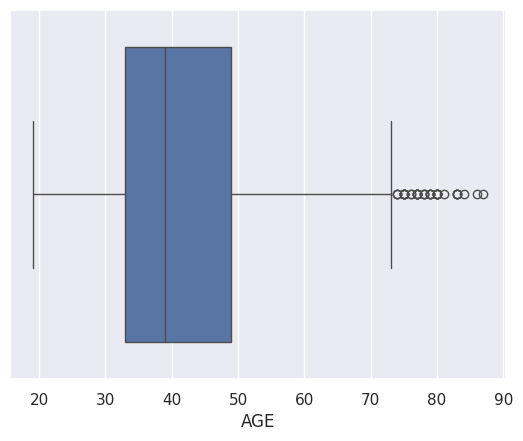

In [ ]:
sns.boxplot(x=df['AGE'])

<Axes: xlabel='BALANCE'>

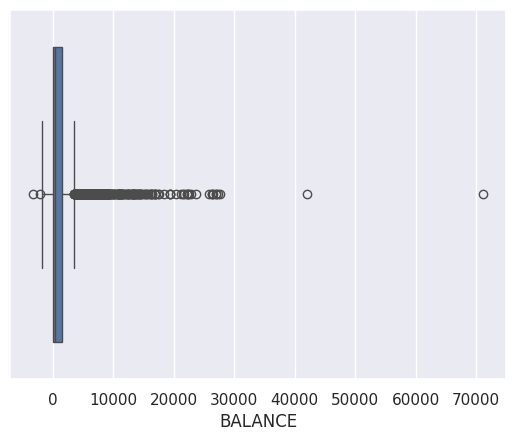

In [ ]:
sns.boxplot(x=df['BALANCE'])

<Axes: xlabel='DURATION'>

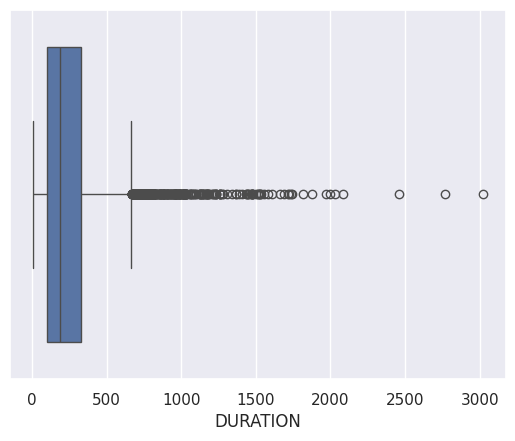

In [ ]:
sns.boxplot(x=df['DURATION'])

<Axes: xlabel='DAY'>

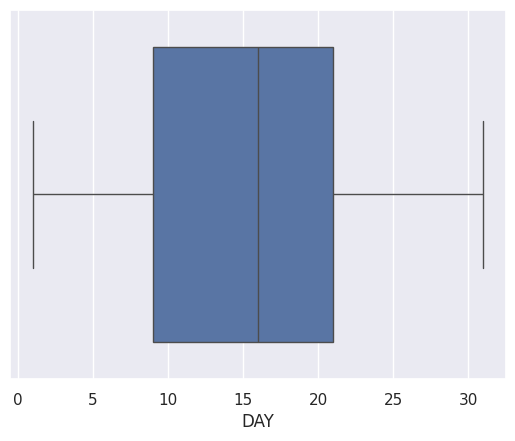

In [ ]:
sns.boxplot(x=df['DAY'])

<Axes: xlabel='PDAYS'>

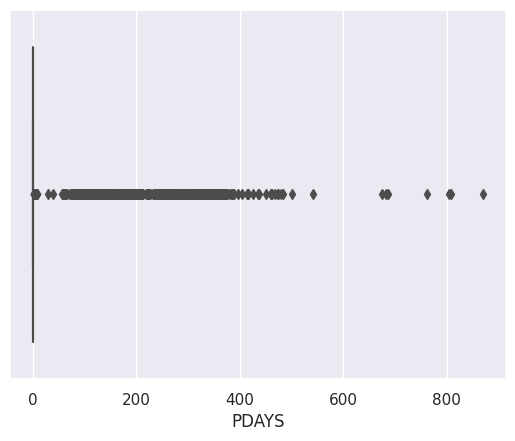

In [ ]:
sns.boxplot(x=df['PDAYS'])

<Axes: xlabel='CAMPAIGN'>

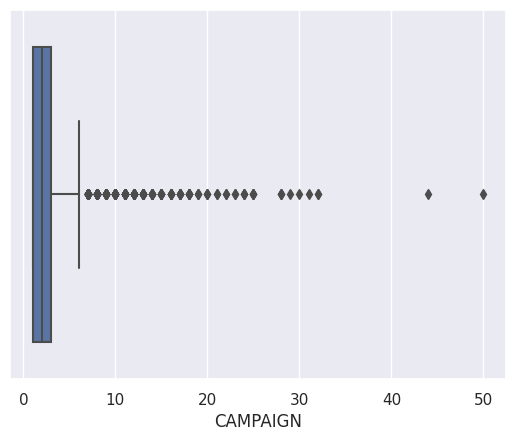

In [ ]:
sns.boxplot(x=df['CAMPAIGN'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AGE           16.0
BALANCE     1411.0
DAY           12.0
DURATION     225.0
CAMPAIGN       2.0
PDAYS          0.0
PREVIOUS       0.0
dtype: float64


<ipython-input-24-d7397e803310>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-24-d7397e803310>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


# **Representar diferentes características entre sí (dispersión), contra la frecuencia (histograma)**


### Histograma

El histograma de frecuencaias se refiere a la frecuencia de aparición de las variables en un intervalo. En este caso, hay principalmente 10 tipos diferentes de empresas de fabricación de coches, pero a menudo es importante saber quién tiene el mayor número de coches. Para ello el histograma es una de las soluciones triviales que nos permite conocer el número total de coches fabricados por una empresa diferente.

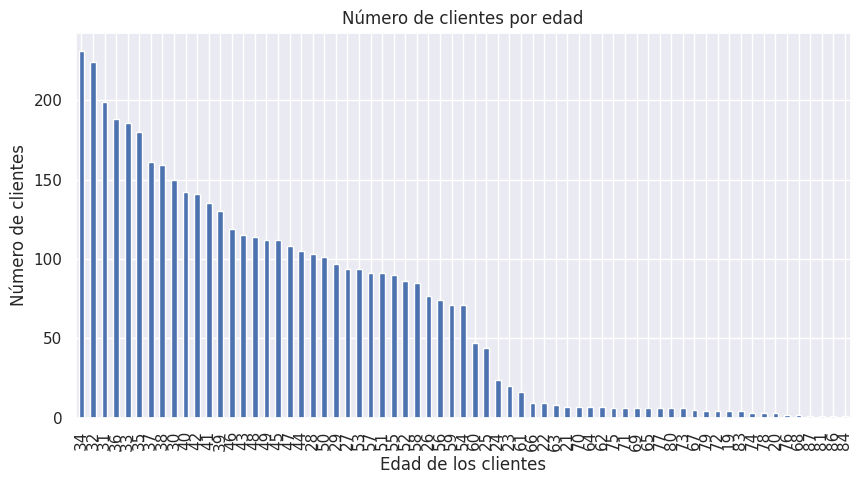

In [ ]:
df.AGE.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Número de clientes por edad")
plt.ylabel('Número de clientes')
plt.xlabel('Edad de los clientes');

### Mapas de calor
Una de las mejores maneras de encontrar la relación entre las características es utilizar mapas de calor (*Heat Map*). En el siguiente mapa de calor sabemos que la característica *Price* depende principalmente de las variables *Engine Size*, *Horsepower*, y *Cylinders.*

In [ ]:
plt.figure(figsize=(10,5))
correlation= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
correlation

<ipython-input-24-e80b3ed25363>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= df.corr()


NameError: name 'c' is not defined

<Figure size 1000x500 with 0 Axes>

### Scatterplot

Generalmente utilizamos los gráficos de dispersión (*scatterplot*) para encontrar la correlación entre dos variables. A modo de ejemplo, el gráfico de dispersión se traza entre las variables *Horsepower* y *Price*. Con el gráfico que se muestra a continuación, podemos trazar fácilmente una línea de tendencia.

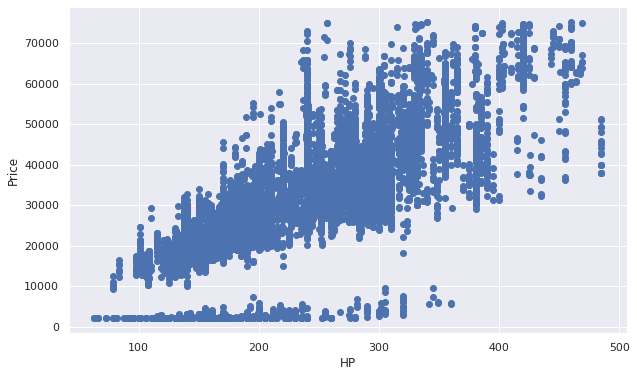

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

---
**DSLAB- Isaac Martín de Diego - 2022**